# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
path=r'C:\Users\ANIL\Downloads'
os.chdir(path)

In [3]:
dataset=pd.read_csv('College.csv')
dataset.head(30)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [4]:
dataset.shape

(777, 19)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [6]:
dataset.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [7]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def StrToFloat(x):
 dataset[x]=label_encoder.fit_transform(dataset[x])
 dataset[x].unique()
for i in dataset.columns:
 StrToFloat(i)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   777 non-null    int32
 1   Private      777 non-null    int32
 2   Apps         777 non-null    int64
 3   Accept       777 non-null    int64
 4   Enroll       777 non-null    int64
 5   Top10perc    777 non-null    int64
 6   Top25perc    777 non-null    int64
 7   F.Undergrad  777 non-null    int64
 8   P.Undergrad  777 non-null    int64
 9   Outstate     777 non-null    int64
 10  Room.Board   777 non-null    int64
 11  Books        777 non-null    int64
 12  Personal     777 non-null    int64
 13  PhD          777 non-null    int64
 14  Terminal     777 non-null    int64
 15  S.F.Ratio    777 non-null    int64
 16  perc.alumni  777 non-null    int64
 17  Expend       777 non-null    int64
 18  Grad.Rate    777 non-null    int64
dtypes: int32(2), int64(17)
memory usage: 109.4 KB


In [9]:
dataset.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Private'}>,
        <AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>],
       [<AxesSubplot:title={'center':'Enroll'}>,
        <AxesSubplot:title={'center':'Top10perc'}>,
        <AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>],
       [<AxesSubplot:title={'center':'P.Undergrad'}>,
        <AxesSubplot:title={'center':'Outstate'}>,
        <AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>],
       [<AxesSubplot:title={'center':'Personal'}>,
        <AxesSubplot:title={'center':'PhD'}>,
        <AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>],
       [<AxesSubplot:title={'center':'perc.alumni'}>,
        <AxesSubplot:title={'center':'Expend'}>,
        <AxesSubplot:title={'center':'Grad.Rate'}>, <AxesSubplot:>]],
      dtype

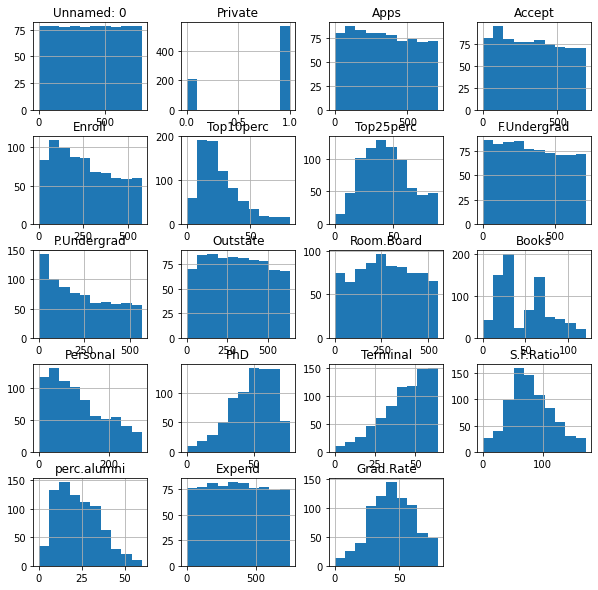

In [10]:
dataset.hist(figsize=(10,10))

In [11]:
dataset.shape

(777, 19)

In [12]:
X = dataset.iloc[:, [17, 18]].values

In [13]:
dataset

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1,352,337,356,22,40,460,275,169,98,23,232,46,42,120,12,219,39
1,1,1,414,452,286,15,17,441,405,440,520,98,137,7,2,61,16,541,35
2,2,1,314,318,182,21,38,178,84,388,188,17,90,29,30,68,30,401,33
3,3,1,57,61,42,58,77,31,57,466,442,23,48,68,61,20,37,713,38
4,4,1,8,6,3,15,32,3,358,175,251,105,137,52,36,58,2,560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,0,416,392,298,3,14,478,490,127,212,35,92,36,24,147,14,22,19
773,773,1,388,432,348,23,35,456,392,402,394,65,98,49,39,72,31,444,62
774,774,1,404,451,348,33,49,451,130,136,271,70,35,43,39,83,20,360,28
775,775,1,668,504,449,80,87,555,74,634,525,74,224,72,60,9,49,739,78


## Using the elbow method to find the optimal number of clusters

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


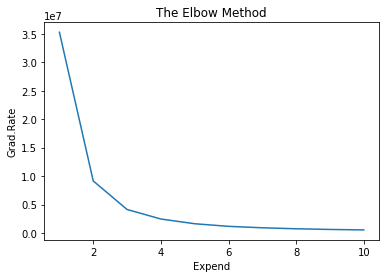

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Expend')
plt.ylabel('Grad.Rate')
plt.show()

In [15]:
km = KMeans(n_clusters =4, n_jobs = 4, random_state=21)
km.fit(X)

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=4, random_state=21)

In [16]:
centers = km.cluster_centers_
print(centers)

[[467.18781726  46.88324873]
 [282.06        42.1       ]
 [ 95.76649746  35.32994924]
 [652.          54.44808743]]


In [17]:
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 2 1 2 2 1 1 2 2 1 2 2 1 1 1 0 2 1 2 0 2 0 0 0 2 0 0 0 1 1 0 2 0 0 1 1 2
 2 1 1 1 0 1 1 2 0 0 2 2 2 1 1 1 0 1 1 0 0 1 2 2 0 2 1 2 0 0 1 1 1 2 2 2 0
 1 0 1 1 1 0 1 0 0 1 1 1 2 2 1 0 0 2 0 1 2 1 2 0 1 1 2 1 0 0 0 0 2 2 2 1 2
 1 0 0 2 2 1 2 1 0 2 1 2 2 1 0 0 2 1 1 1 0 1 0 1 0 1 2 1 2 2 1 0 1 2 0 0 1
 0 2 2 2 2 0 1 0 1 1 2 2 1 0 2 2 2 0 1 0 0 0 2 1 2 1 2 2 1 1 0 1 0 0 2 0 2
 1 1 1 0 2 1 2 0 1 1 1 2 0 1 0 1 0 0 0 0 2 0 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2
 2 1 0 2 0 1 1 2 2 1 0 0 0 1 1 2 0 1 2 1 2 2 2 0 1 0 0 2 2 2 0 1 2 2 2 2 2
 2 1 1 1 1 1 0 1 0 2 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 2 0 1 2 0 0 0 0 2 1 1 1
 2 0 1 2 1 2 0 0 0 0 2 1 1 2 1 1 0 2 1 0 2 0 1 1 0 0 1 1 0 0 1 2 1 2 1 1 1
 0 2 2 0 1 2 2 0 0 2 1 2 0 2 0 2 2 1 1 0 1 2 0 0 0 1 1 0 0 1 0 1 1 2 1 0 1
 1 1 2 0 0 0 0 0 0 2 1 0 0 0 2 0 1 1 1 0 2 0 0 0 0 1 0 2 0 0 2 0 1 1 1 2 1
 2 0 1 0 0 1 2 1 0 2 0 1 0 0 0 0 0 2 1 0 0 2 2 1 2 1 2 0 0 0 1 0 0 2 1 1 2
 0 1 2 0 1 1 1 0 0 2 1 1 2 0 1 2 1 1 1 0 1 0 0 2 2 2 2 2 2 2 2 0 1 1 0 1 2
 1 0 2 2 2 0 1 0 0 1 0 2 

array([[129.03731343,  36.59701493],
       [376.36015326,  44.93103448],
       [620.23387097,  52.60080645]])

## Training the K-Means model on the dataset

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

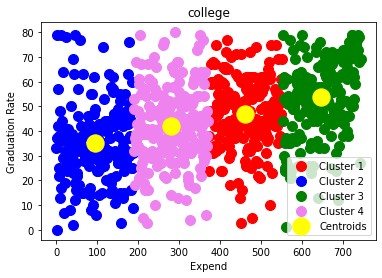

In [49]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('college')
plt.xlabel('Expend')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()